# 0) manage imports (install libraries)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import nn

import vaex
import os

from cycler import cycler

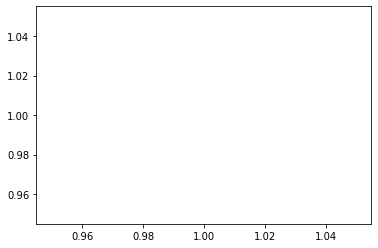

In [4]:


plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

In [5]:
x = torch.rand(5,3)

In [6]:
print(x)

tensor([[0.8941, 0.2215, 0.6792],
        [0.8170, 0.4001, 0.9185],
        [0.2862, 0.1162, 0.3634],
        [0.4094, 0.0970, 0.8216],
        [0.3007, 0.7027, 0.4790]])


In [7]:
print(x.device)

cpu


In [8]:
torch.cuda.is_available()

False

# handle training data from them

In [10]:
path = "/net/virgo01/data/users/spirov/Nexus Project/torchData"
p2 = "/net/virgo01/data/users/spirov/Nexus Project/"

training_data = datasets.FashionMNIST(
    root=path,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=path,
    train=False,
    download=True,
    transform=ToTensor()
)

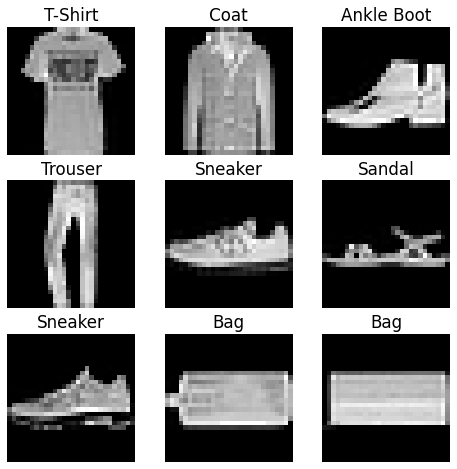

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /net/virgo01/data/users/spirov/Nexus Project/torchData
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
a,b = training_data[20]

print(a.shape)

torch.Size([1, 28, 28])


# Get ma own data

In [44]:
@vaex.register_function()
def correct(x):
    L = 75000
    return np.where(np.abs(x)>L/2, x-np.sign(x)*L,x)

def localizeDataFrame(absDf, x,y,z):
    rx = absDf.X - x
    ry = absDf.Y - y
    rz = absDf.Z - z
    
    L = 75000
    
    relx = rx.correct()
    rely = ry.correct()
    relz = rz.correct()
    
    
    relR = np.sqrt(relx**2 + rely**2+relz**2)
    
    theta = np.arccos(-relz/relR)
    fi = np.arctan2(relx,rely)
    
    relDf = absDf.copy()
    
    Vaway = (relx*absDf.Vx+rely*absDf.Vy+relz*absDf.Vz)/relR
    
    
    #relDf["relX"] = relx
    #relDf["relY"] = rely
    #relDf["relZ"] = relz
    
    
    
    relDf["Th"] = theta
    relDf["Fi"] = fi
    #relDf["Vr"] = Vaway
    relDf["R"] = relR
    relDf["CZ"] = relR/10 +Vaway
    
    
    return relDf


    
c = 75000/2
df = vaex.open(p2+"baby_135.hdf5")

cdf = localizeDataFrame(df,c,c,c)

In [45]:
cdf

#,ID,X,Y,Z,Vx,Vy,Vz,Th,Fi,R,CZ
0,88038007,860.2786,26320.94,18281.758,37.119167,37.119167,37.119167,1.1057995315154274,-1.8669324481887126,42857.68896960056,4227.707937014152
1,85110287,876.1454,26313.068,18315.36,46.490185,46.490185,46.490185,1.106365925466451,-1.8672499612502274,42831.117949900705,4210.39294093884
2,2455782,835.2286,26338.094,18252.865,84.1315,84.1315,84.1315,1.1053955973555003,-1.866313629392406,42887.59345777748,4157.182359208069
3,16857137,858.7243,26316.842,18264.977,198.44557,198.44557,198.44557,1.1054776949090432,-1.8670229102756652,42867.614342518566,3976.325388450719
4,3606632,896.4845,26311.473,18312.871,-67.41129,-67.41129,-67.41129,1.106115344909781,-1.8674450734423877,42815.259147837874,4386.982536372075
...,...,...,...,...,...,...,...,...,...,...,...
"94,192",94188309,58549.383,13108.994,54404.824,-77.4091,-77.4091,-77.4091,2.0540094494684933,2.4296009654305544,36383.660693861915,3609.5092907707735
"94,193",94190122,63087.734,64921.375,32827.848,70.52311,70.52311,70.52311,1.4468623805003147,0.7508209024434535,37795.40930932473,3869.7336970068104
"94,194",94191919,61481.805,50194.68,56268.66,189.83301,189.83301,189.83301,2.175923015232134,1.0839482260656859,32993.09704314568,3618.325483318334
"94,195",94193706,69685.836,21123.016,21380.727,172.54877,172.54877,172.54877,1.150974282067861,2.0414796372482615,39546.99265895643,3953.3448541387015


In [46]:
name = "testMan.hdf5"
cdf.export_hdf5(path+"/relativeDataFrames/"+name)

In [56]:
class CustomImageDataset(Dataset):
    def __init__(self,frameDir):
        self.lengt = len(os.listdir(frameDir))
        self.frameDir = frameDir
    
    def __len__(self):
        return self.lengt
        
        
    def __getitem__(self,idx):
        fil = self.frameDir+os.listdir(self.frameDir)[idx]
        df = vaex.open(fil)
        
        th = df.Th.values
        fi = df.Fi.values
        R = df.R.values
        CZ = df.CZ.values
        
        broken = np.array((CZ,th,fi))
        truth = np.array((R,th,fi))
        
        return torch.tensor(broken), torch.tensor(truth)
                 
                 
                 

In [57]:
ds = CustomImageDataset(path+"/relativeDataFrames/")

In [58]:
a,b = ds.__getitem__(0)

In [65]:
a.size()

torch.Size([3, 94197])

# Dataloaders

In [67]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


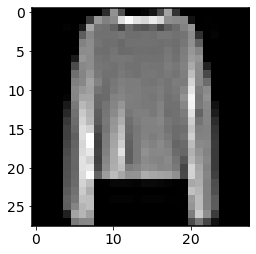

Label: 2


In [95]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Neural Network

In [97]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [98]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [120]:
#hyperparams
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [100]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [101]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [122]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [123]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.311077  [   64/60000]
loss: 2.289315  [ 6464/60000]
loss: 2.287576  [12864/60000]
loss: 2.271818  [19264/60000]
loss: 2.252499  [25664/60000]
loss: 2.240576  [32064/60000]
loss: 2.221709  [38464/60000]
loss: 2.195225  [44864/60000]
loss: 2.199433  [51264/60000]
loss: 2.172425  [57664/60000]
Test Error: 
 Accuracy: 35.2%, Avg loss: 2.160689 

Epoch 2
-------------------------------
loss: 2.191876  [   64/60000]
loss: 2.141080  [ 6464/60000]
loss: 2.123306  [12864/60000]
loss: 2.125257  [19264/60000]
loss: 2.061665  [25664/60000]
loss: 2.009083  [32064/60000]
loss: 2.038937  [38464/60000]
loss: 1.947523  [44864/60000]
loss: 1.966532  [51264/60000]
loss: 1.922498  [57664/60000]
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.890862 

Epoch 3
-------------------------------
loss: 1.853270  [   64/60000]
loss: 1.870249  [ 6464/60000]
loss: 1.772548  [12864/60000]
loss: 1.868834  [19264/60000]
loss: 1.769877  [25664/60000]
loss: 1.766196  [32064/600

In [147]:
a.shape

torch.Size([1, 28, 28])

In [138]:
a,b = training_data[20]
c = model(a)



In [152]:
p= nn.Softmax(dim=1)(c).argmax(1).item()

In [153]:
labels_map[b],labels_map[p]

('Dress', 'Dress')

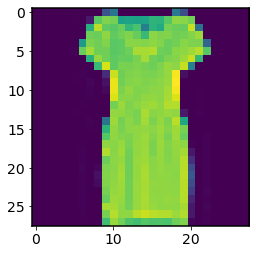

In [154]:
plt.imshow(a[0])

In [155]:
type(test_data)

torchvision.datasets.mnist.FashionMNIST